# 🤖 Risk Scoring Model: Heart Failure Prediction
This notebook trains a classification model to predict the likelihood of patient death using clinical and demographic features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

sns.set(style='whitegrid')

## 📥 Load Dataset and Create Features

In [2]:
df = pd.read_csv('E:/hospital_analytics_project/data/raw/heart_failure_clinical_records_dataset.csv')

# Feature engineering
df['is_elderly'] = (df['age'] > 65).astype(int)
df['low_ejection'] = (df['ejection_fraction'] < 30).astype(int)
df['high_creatinine'] = (df['serum_creatinine'] > 1.5).astype(int)
df['combined_risk_score'] = df['is_elderly'] + df['low_ejection'] + df['high_creatinine']

# Define features and target
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

## 🧪 Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌲 Train Random Forest Classifier

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

## 📊 Model Evaluation

In [5]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.3f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60

Confusion Matrix:
[[33  2]
 [14 11]]

ROC-AUC Score: 0.848


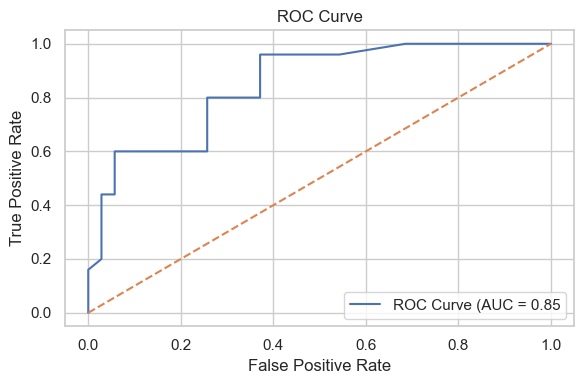

In [6]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 💾 Save the Model

In [7]:
joblib.dump(rf_model, 'E:/hospital_analytics_project/models/risk_scoring_model.pkl')
print("Model saved to E:/hospital_analytics_project/models/risk_scoring_model.pkl")

Model saved to E:/hospital_analytics_project/models/risk_scoring_model.pkl
